# What is Gradient Descent?
***

이번 챕터에서는 경사하강법(Gradient Descent)에 대해서 알아보도록 하겠습니다. ML의 회귀 알고리즘은 **잔차**가 줄어드는 방향으로 계속 학습을 진행하게 되는데 이 때 적용되는 방법이 바로 **경사하강법**입니다.

**경사하강법**은 말그대로 **감소, 하강, 내려간다**는 의미입니다. 앞서 최적의 회귀계수 W를 찾는 과정이 회귀 분석의 핵심이라고 했는데요. 최적의 W를 찾아갈 때 발생하는 오류를 줄이기 위해 W를 갱신해가면서 **오류가 최소화 되는 W**를 찾아가게 됩니다. 

***

우리가 산을 내려갈 때를 가정해보겠습니다. 지도가 없기 때문에 마냥 앞만 보고 가야할 상황이라고 했을 때 종착지에 도착하기 전에는 현재 있는 곳이 어디 지점인지는 알 수 없죠. 좀 더 확실한 설명을 위해 그림과 함께 설명하도록 하겠습니다.


In [167]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(-5, 4)
y = np.sin(x) ** 2 - .2 * x

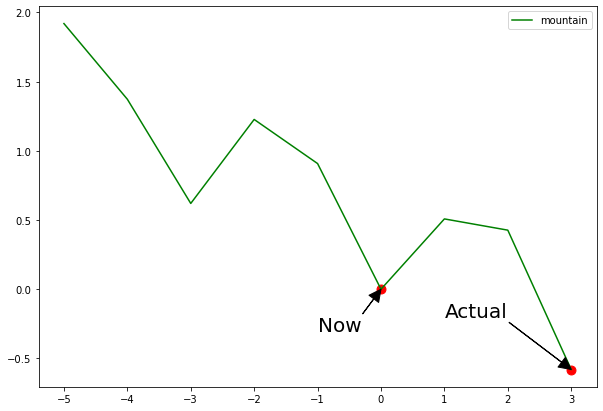

In [3]:
plt.figure(figsize = (10, 7))
plt.plot(x, y, color = 'g', label = 'mountain')

plt.scatter([0,3], [np.sin(0) ** 2,np.sin(3) ** 2 - .2* 3], s = 80, color = 'red')
plt.annotate('Now', xy=(0, np.sin(0) **2), xytext = (-1, -.3), fontsize = 20, arrowprops = dict(facecolor = 'black', width = .3))
plt.annotate('Actual', xy=(3, np.sin(3) **2 - .2 * 3), xytext = (1, -.2), fontsize = 20, arrowprops = dict(facecolor = 'black', width = .3))
plt.legend()
plt.show()

초록색 선을 산이라고 가정하고 현재 위치가 **Now**에 있다고 해봅시다. 실제 종착지는 **Actual**지역입니다. 만약 **Now**에 있으면서 다 왔다고 생각한다면 고립이 될 것입니다. 이제 저 산을 **오류 함수**를 **미분**한 것이라고 생각해보죠. 실제로 오류가 최소가 되는 지역은 **Actual**이지만 학습 과정에서 **Now**에 있을 때 학습이 종료가 될 수 있습니다. **Global**한 **전역 최소값**을 찾는 것이 회귀분석 성능을 좌우한다고 볼 수 있습니다.

하지만 실제 ML 문제에서는 변수가 아주 많은 회귀분석을 진행하기 때문에 **편미분**을 하게 됩니다. 편미분을 하게 되면 그 값이 매우 커질 수가 있기 때문에 **학습률(learning rate)**을 곱하게 됩니다. 

즉 **경사하강법**을 통해서 **오류(잔차)**를 가장 작게 만드는 **최적의 회귀계수 W**를 찾기 위해 데이터를 학습하고 예측을 하게 되는 것입니다. 이제 실제로 경사하강법을 간단하게 구현해보도록 하겠습니다.


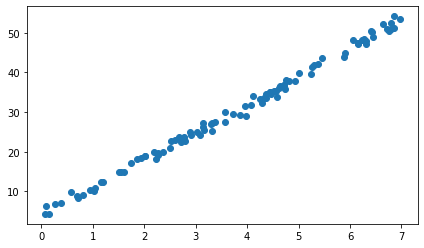

In [125]:
plt.figure(figsize = (7, 4))
x = 7 * np.random.rand(100, 1)
y = 4 + 7 * x + np.random.randn(100, 1)

plt.scatter(x, y)
plt.show()

실제 위 데이터를 표현할 수 있는 회귀선은 7x + 4에 근사할 것입니다. 이제 실제로 회귀 직선을 모른다고 가정하고 y = w0 + w1 * x 로 설정한 후 w0과 w1을 각각 4와 7에 근사하도록 경사하강법을 구현해보겠습니다.

In [203]:
def get_new_w(w1, w0, data, target, lr) :
    n = len(target)
    
    new_w1 = np.zeros(w1.shape)
    new_w0 = np.zeros(w0.shape)
    
    pred = np.dot(data, w1.T) + w0
    
    gap = target - pred
    
    set_w0 = np.ones((n, 1))
    
    new_w1 = -(2 / n) * lr * (np.dot(data.T, gap))
    new_w0 = -(2 / n) * lr * (np.dot(set_w0.T, gap))
    
    return new_w1, new_w0

In [204]:
def step_gd(data, target) :
    
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for s in range(1000) :
        new_w1, new_w0 = get_new_w(w1, w0, data, target, .01)
        w1 -= new_w1
        w0 -= new_w0
        
    return w1, w0

In [205]:
from sklearn.metrics import mean_squared_error

In [206]:
w1, w0 = step_gd(x, y)
print(f'경사하강법 구현 후 계산한 w1 = {w1[0][0]}, w0 = {w0[0][0]}')
pred = w1[0][0] * x + w0[0][0]

loss = mean_squared_error(y, pred)
print(f'경사하강법 구현으로 구한 계수를 사용하여 만든 모델의 오차는 {loss}')

경사하강법 구현 후 계산한 w1 = 7.02548361672078, w0 = 3.8607788714765454
경사하강법 구현으로 구한 계수를 사용하여 만든 모델의 오차는 0.8630204797484656


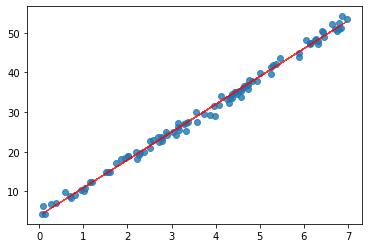

In [207]:
plt.scatter(x, y, alpha = .8)
plt.plot(x, pred,color = 'red', linewidth = .8, alpha = .8)
plt.show()

실제로 위에서 작성한 식인 7x + 4와 비교했을 때 매우 비슷한 회귀계수를 얻을 수 있었습니다. 빨간선(회귀선)이 예측값과 실제 값의 차이를 최소화하며 지나고 있는것을 볼 수 있습니다. 이렇듯 ML에서 회귀 문제는 **오차**를 줄이는 것이 핵심입니다. 위에서는 데이터도 매우 적고 변수도 매우 적기 때문에 계산 과정이 간단한 것은 물론 단순한 1차식으로 회귀식이 도출되었습니다. 하지만 실제 문제에서는 **훨씬 더 많은 데이터와 변수가 존재**하기 때문에 일반적인 경사하강법으로 데이터를 학습하기에는 무리가 있습니다.

위와 같은 이유로 실제 문제에서는 **확률적 경사하강법(Stochastic Gradient Descent)**이 이용되는데요. 확률적 경사하강법은 말그대로 **일부 데이터를 확률적으로 추출**하여 회귀계수를 갱신하는데 사용하는 방법입니다. 그렇기 때문에 기존의 방법에 비해서 수행 속도는 빠른편입니다. 한 번 실제로 구현해보도록 하겠습니다.

In [208]:
def sgd(data, target, bs = 32) : # bs는 batch_size
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    idx = 0
    
    for i in range(1000) :
        np.random.seed(i)
        
        rand_idx = random.sample(range(0, 100), bs)
        
        sam_X = data[rand_idx]
        sam_y = target[rand_idx]
        
        new_w1, new_w0 = get_new_w(w1, w0, sam_X, sam_y, lr = 0.01)
        
        w1 -= new_w1
        w0 -= new_w0
        
    return w1, w0

In [209]:
w1, w0 = sgd(x, y)
print(f'경사하강법 구현 후 계산한 w1 = {w1[0][0]}, w0 = {w0[0][0]}')
pred = w1[0][0] * x + w0[0][0]

loss = mean_squared_error(y, pred)
print(f'경사하강법 구현으로 구한 계수를 사용하여 만든 모델의 오차는 {loss}')

경사하강법 구현 후 계산한 w1 = 7.044819595958082, w0 = 3.8852342705383203
경사하강법 구현으로 구한 계수를 사용하여 만든 모델의 오차는 0.8734788826434416


전체 데이터에서 32개의 데이터만 뽑아서 확률적 경사하강법을 구현했을 때의 회귀계수는 기존 경사하강법과 큰 차이가 없으며 오차를 봤을때도 그 차이가 적은것을 알 수 있습니다. 지금은 단일변수이기 때문에 성능과 수행속도는 차이가 미미하지만 데이터가 커지고 변수가 많아지면 확률적 경사하강법이 훨씬 더 유용할 것입니다. 

지금까지 회귀분석에서 제일 중요한 **오차**를 줄이기 위해 사용되는 **경사하강법**에 대해서 알아보았습니다. 다음 챕터에서는 회귀분석의 다항회귀와 과적합에 대해서 공부해보겠습니다. 감사합니다.